# Imbalanced datasets



Imbalanced Dataset merupakan data yang biasanya diolah secara klasifikasi dengan salah satu kelas/label pada datanya mempunyai nilai yang sangat jauh berbeda jumlahnya dari kelas lainnya. Pada imbalanced dataset, biasanya kita memiliki data dengan kelas yang sedikit (rare class) dan data dengan kelas yang banyak (abundant class). Ada beberapa cara untuk menghandle masalah ini yaitu :

*   Change the performance metric
*   Random Oversampling
*   SMOTE Oversampling
*   Random Undersampling
*   NearMiss Undersampling











# Datasets

In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 

In [ ]:
# Memasukkan dataset yang akan digunakan
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Melihat jumlah data dan jenis fitur pada class 
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# RobustScaler untuk mengurangi rentan pada outlier
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
# Ratio dari Class
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% dari dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% dari dataset')

No Frauds 99.83 % dari dataset
Frauds 0.17 % dari dataset


Dari hasil diatas. Perbandingan ratio dari dataset yang digunakan terlalu timpang sebelah dikarenakan data tidak balanced 

In [ ]:
# Membagi data train dan data test
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# Merubah ke peforma metric pada dataset

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Pada test kali ini , kita menggunakan model Logistic Regression untuk melihat hasil akurasi pada dataset yang tidak balanced

In [ ]:
# Accuracy 0.999%
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.999%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Akurasi bukanlah metrik terbaik untuk digunakan saat mengevaluasi kumpulan data yang tidak seimbang.


*   Confusion Matrix: menampilkan prediksi yang benar dan jenis prediksi yang salah.

*   Presisi: Jumlah positif sejati dibagi dengan semua prediksi positif. Presisi rendah menunjukkan jumlah positif palsu yang tinggi
*  Recall: Jumlah positif sejati dibagi dengan jumlah nilai positif dalam data uji. Ingatan yang rendah menunjukkan jumlah negatif palsu yang tinggi.


* Skor F1: rata-rata tertimbang presisi dan daya ingat.


* AUC: adalah grafik yang menunjukkan kinerja model klasifikasi pada semua ambang klasifikasi.






In [ ]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[71062,     8],
       [   47,    85]])

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.91      0.64      0.76       132

    accuracy                           1.00     71202
   macro avg       0.96      0.82      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# Recall
recall_score(y_test, y_pred)

0.6439393939393939

In [ ]:
# F1 Score
f1_score(y_test, y_pred)

0.7555555555555555

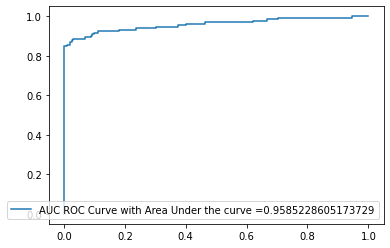

In [ ]:
# AUC
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

generate_auc_roc_curve(model, X_test)

Dari hasil diatas dapat dikesimpulkan , adanya keanehan dalam klasifikasi report dimana hasil dari akurasi tersebut sangat sempurna yaitu 0,999 tetapi F1 skor pada hasil diatas hanya 0,75% dan recall hanya 0,64% . Dari sini kita bisa melihat adanya kesalahan dalam hasil tersebut. 

## **NOTE : Metode harus diterapkan pada set pelatihan. Jika diterapkan pada set tes, evaluasi yang benar tidak dapat dilakukan.**

# **1. Oversampling**

### Random Oversampling
Penambahan sampel yang dipilih secara acak dari kelas minoritas. Teknik ini dapat digunakan jika kumpulan datanya kecil. Ini dapat menyebabkan overfitting

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
#A floating point value can be specified to indicate the ratio of minority class majority examples in the transformed dataset. (0.5)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)

In [ ]:
#before random oversampling
y_train.value_counts()

0    213245
1       360
Name: Class, dtype: int64

In [ ]:
#after random oversampling
y_randomover.value_counts()

0    213245
1    213245
Name: Class, dtype: int64

In [ ]:
model.fit(X_randomover, y_randomover)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.978%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# confusion_matrix
confusion_matrix(y_test,y_pred)

array([[69534,  1536],
       [   15,   117]])

In [ ]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.07      0.89      0.13       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
# recall_score 
recall_score(y_test, y_pred)

0.8863636363636364

In [ ]:
# f1_score
f1_score(y_test, y_pred)

0.1310924369747899

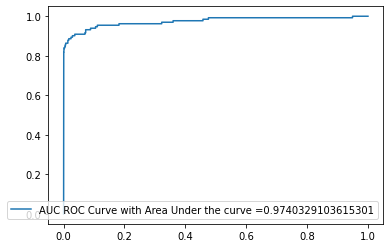

In [ ]:
generate_auc_roc_curve(model, X_test)

### SMOTE Oversampling
Membuat sampel sintetis dari kelas minoritas untuk mencegah overfitting.

SMOTE pertama-tama memilih instance kelas minoritas a secara acak dan menemukan k tetangga kelas minoritas terdekatnya. Instance sintetik kemudian dibuat dengan memilih salah satu dari k tetangga terdekat b secara acak dan menghubungkan a dan b untuk membentuk segmen garis dalam ruang fitur. Instans sintetik dihasilkan sebagai kombinasi cembung dari dua instans terpilih a dan b

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
#before smote oversampling
y_train.value_counts()

0    213245
1       360
Name: Class, dtype: int64

In [ ]:
#after smote oversampling
y_smote.value_counts()

0    213245
1    213245
Name: Class, dtype: int64

In [ ]:
#modelling
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.977%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# confusion_matrix
confusion_matrix(y_test,y_pred)

array([[69464,  1606],
       [   15,   117]])

In [ ]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.07      0.89      0.13       132

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



In [ ]:
# recall_score 
recall_score(y_test, y_pred)

0.8863636363636364

In [ ]:
# f1_score
f1_score(y_test, y_pred)

0.1261455525606469

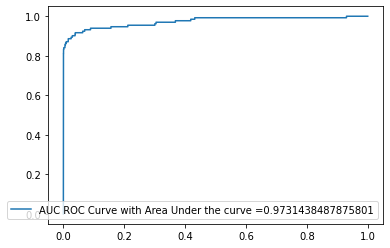

In [ ]:
generate_auc_roc_curve(model, X_test)

# **2. Undersampling**
Ini adalah teknik penyeimbangan kumpulan data dengan menghapus sampel milik kelas mayoritas. Anda dapat menggunakan teknik ini jika Anda memiliki kumpulan data yang besar. Informasi mungkin hilang karena pemilihan acak.

### Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# transform the dataset
ranUnSample = RandomUnderSampler()
X_ranUnSample, y_ranUnSample = ranUnSample.fit_resample(X_train, y_train)

In [ ]:
#before Random undersampling
y_train.value_counts()

0    213245
1       360
Name: Class, dtype: int64

In [ ]:
#after Random undersampling
y_ranUnSample.value_counts()

In [ ]:
#modelling
model.fit(X_ranUnSample, y_ranUnSample)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.963%


In [ ]:
# confusion_matrix
confusion_matrix(y_test,y_pred)

array([[68442,  2628],
       [   14,   118]])

In [ ]:
# recall_score 
recall_score(y_test, y_pred)

In [ ]:
# f1_score
f1_score(y_test, y_pred)

0.08200138985406533

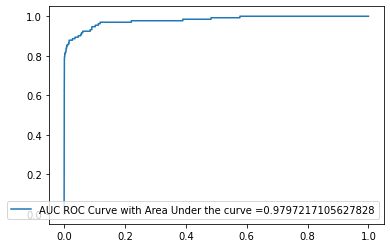

In [ ]:
generate_auc_roc_curve(model, X_test)

Kekhawatiran di sini adalah bahwa jumlah sampel yang kami gunakan untuk melatih model kecil.

### NearMiss Undersampling
NearMiss Undersampling
Ini mencegah hilangnya informasi. Ini didasarkan pada algoritma KNN. Jarak antara sampel yang termasuk dalam kelas mayoritas dan sampel yang termasuk dalam kelas minoritas dihitung. Sampel yang jaraknya lebih pendek dari nilai k yang ditentukan dipertahankan.

Tiga Versi:


1.   NearMiss-1: Contoh kelas mayoritas dengan jarak rata-rata minimum ke tiga contoh kelas minoritas terdekat.
2.   NearMiss-2: Contoh kelas mayoritas dengan jarak rata-rata minimum ke tiga contoh kelas minoritas terjauh.
3.   NearMiss-3: Contoh kelas mayoritas dengan jarak minimum ke setiap contoh kelas minoritas.

NearMiss-3 tampaknya diinginkan, mengingat itu hanya akan menyimpan contoh kelas mayoritas yang ada di batas keputusan

In [ ]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
NearMiss1 = NearMiss(version=3)
X_nearMiss, y_nearMiss = NearMiss1.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


In [ ]:
y_nearMiss.value_counts()

1    360
0    322
Name: Class, dtype: int64

In [ ]:
#modelling
model.fit(X_nearMiss, y_nearMiss)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.892%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# confusion_matrix
confusion_matrix(y_test,y_pred)

array([[63391,  7679],
       [   32,   100]])

In [ ]:
# recall_score 
recall_score(y_test, y_pred)

0.7575757575757576

In [ ]:
# f1_score
f1_score(y_test, y_pred)

0.02528125395019593

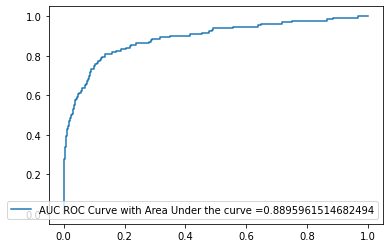

In [ ]:
generate_auc_roc_curve(model, X_test)